In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline 
sns.set(style="ticks")

Исходные данные:

In [61]:
data = pd.read_csv('../data/ramen-ratings.csv')
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [62]:
data.shape

(2580, 7)

### 1. Удаление пропусков

Удалим колонки, содержащие пустые значения

In [63]:
data = data.dropna(axis=1, how='any')
data.head()

,Review #,Brand,Variety,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,India,3.75


Размер набора:

In [64]:
data.shape

(2580, 5)

Удостоверимся, что пропуски отсутствуют:

In [65]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Review # - int64 - 0
Brand - object - 0
Variety - object - 0
Country - object - 0
Stars - object - 0


Как видно, ни один признак не имеет пропусков

### 2. Кодирование категориальных признаков

Категориальные признаки:

In [66]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Brand
Variety
Country
Stars


Выполним кодирование:

In [67]:
le1 = LabelEncoder()
data['Brand'] = le1.fit_transform(data['Brand']);

In [68]:
le2 = LabelEncoder()
data['Variety'] = le2.fit_transform(data['Variety']);

In [69]:
le3 = LabelEncoder()
data['Country'] = le3.fit_transform(data['Country']);

In [70]:
le4 = LabelEncoder()
data['Stars'] = le4.fit_transform(data['Stars']);

Выполним проверку:

In [71]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Как видно, категориальных признаков не осталось

### 3. Разделение выборки на обучающую и тестовую

Разделим данные на целевой столбец и признаки

In [84]:
X = data.drop('Country', axis=1)
X

,Review #,Brand,Variety,Stars
0,2580,190,2189,36
1,2579,119,1443,6
2,2578,192,454,15
3,2577,336,709,18
4,2576,38,1954,36
...,...,...,...,...
2575,5,329,850,31
2576,4,332,1511,6
2577,3,332,2252,12
2578,2,332,2248,12


In [85]:
Y = data[['Country']]
Y

,Country
0,18
1,32
2,35
3,32
4,16
...,...
2575,37
2576,33
2577,33
2578,33


С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [89]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (1935, 4)
X_test: (645, 4)
Y_train: (1935, 1)
Y_test: (645, 1)


### 4. Обучение модели с произвольным гиперпараметром

In [90]:
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


(0.24857881136950905, 0.19689922480620156)

### 5. Построение и оценка качества модели

In [93]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y, cv=3)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

Значение метрики accuracy для 3 фолдов

In [94]:
scores

array([0.0744186 , 0.13604651, 0.09302326])

Усредненное значение метрики accuracy для 3 фолдов

In [95]:
np.mean(scores)

0.10116279069767442

### 6.  Подбор гиперпараметра

Произведем подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [96]:
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [97]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf_gs.fit(X, Y)
clf_gs.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

CPU times: user 18.1 s, sys: 517 ms, total: 18.6 s
Wall time: 19 s


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 1}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

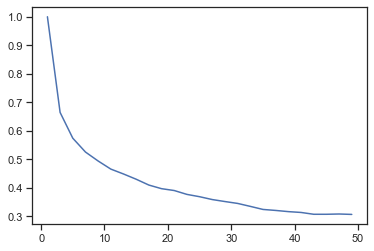

In [98]:
plt.plot(n_range, clf_gs.cv_results_["mean_train_score"]);

Очевидно, что для $K=1$ на тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность.
Посмотрим на тестовом наборе данных

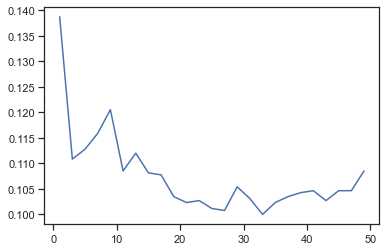

In [100]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

Проверим получившуюся модель:

In [101]:
cl1_2 = KNeighborsClassifier(**clf_gs.best_params_)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


(1.0, 0.42170542635658914)